## some tests about cluster label

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import math
import matplotlib.pyplot as plt

df = pd.read_csv('/hpcfs/juno/junogpu/fuys/yuntianchi/xu/tianchi_channel_1/tcdata/train.csv',sep="\|,\|",names=["id","report","label"],index_col=0)
report_value = df['label'].values

ipykernel_launcher:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [2]:
count=0
cluster_words = 29
matrix = np.zeros((cluster_words, cluster_words))
cov_matrix = np.zeros((20000,cluster_words))
Labels = []
for label in report_value:
    if "," not in label:
        label += ","
    text=[]
    label_area,label_ill = label.split(',')
    if label_area == '':
        pass
    elif cluster_words !=12:
        area_lines = label_area.split()
        for area_line in area_lines: 
            text.append(int(area_line))
    if cluster_words ==29 or cluster_words == 12:
        if label_ill == '':
            pass
        else:
            ill_lines = label_ill.split()
            for ill_line in ill_lines:
                if cluster_words !=12:
                    text.append(int(ill_line)+17)
                else:
                    text.append(int(ill_line))
    Labels.append(text)

for label in Labels:
    for word_x in range(cluster_words):
        for word_y in range(cluster_words):
            if word_x in label and word_y in label:
                matrix[word_x][word_y]+=1
#### cov matrix 
line_count=0
for label in Labels:
    for word_x in range(cluster_words):
        if word_x in label:
            cov_matrix[line_count][word_x]=1
    line_count+=1
import pandas as pd 
df = pd.DataFrame(cov_matrix)
df_corr = df.corr()
print(df_corr)
#print(cov_matrix[19997])
#print(np.cov(cov_matrix,rowvar=False,bias=True))
#M = np.cov(cov_matrix,rowvar=False,bias=True)

          0         1         2         3         4         5         6   \
0   1.000000  0.495984  0.277356  0.037165  0.123976 -0.009620  0.023386   
1   0.495984  1.000000  0.204113  0.195869  0.115939 -0.014008  0.025947   
2   0.277356  0.204113  1.000000  0.208566 -0.017804 -0.030026 -0.006672   
3   0.037165  0.195869  0.208566  1.000000 -0.012141 -0.014508  0.010921   
4   0.123976  0.115939 -0.017804 -0.012141  1.000000  0.183938  0.034118   
5  -0.009620 -0.014008 -0.030026 -0.014508  0.183938  1.000000  0.017744   
6   0.023386  0.025947 -0.006672  0.010921  0.034118  0.017744  1.000000   
7   0.480494  0.319772  0.038325  0.002391  0.094311 -0.015731  0.030256   
8   0.320742  0.485883  0.001270  0.035288  0.090646 -0.016190  0.035135   
9   0.044372  0.012276  0.146430  0.032152 -0.074265 -0.032830 -0.008218   
10  0.014753  0.049537  0.025453  0.167743 -0.024248 -0.016253  0.033480   
11  0.091647  0.091266 -0.073214 -0.028976  0.606759  0.180340  0.018848   
12 -0.015838

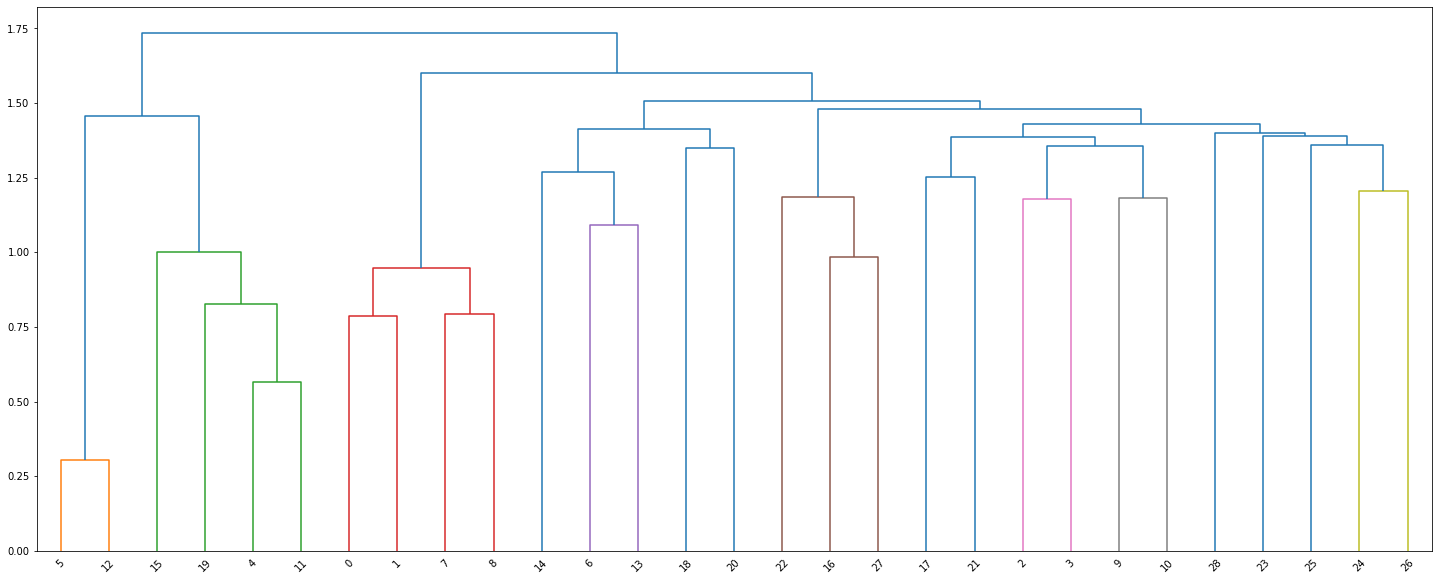

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# single complete average weighted centroid median ward
Z = linkage(df_corr, 'average')

f = fcluster(Z,4,'distance')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [4]:
print(Z)

[[ 5.         12.          0.30346609  2.        ]
 [ 4.         11.          0.56423168  2.        ]
 [ 0.          1.          0.78589079  2.        ]
 [ 7.          8.          0.79377845  2.        ]
 [19.         30.          0.82572764  3.        ]
 [31.         32.          0.94659953  4.        ]
 [16.         27.          0.98586187  2.        ]
 [15.         33.          1.00249594  4.        ]
 [ 6.         13.          1.091981    2.        ]
 [ 2.          3.          1.17748095  2.        ]
 [ 9.         10.          1.18329304  2.        ]
 [22.         35.          1.1854483   3.        ]
 [24.         26.          1.20687528  2.        ]
 [17.         21.          1.25214238  2.        ]
 [14.         37.          1.27071004  3.        ]
 [18.         20.          1.35063856  2.        ]
 [38.         39.          1.35503397  4.        ]
 [25.         41.          1.3597576   3.        ]
 [42.         45.          1.38687147  6.        ]
 [23.         46.          1.39